In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [32]:
testdf=pd.read_csv('sign_mnist_test.csv')
traindf=pd.read_csv('sign_mnist_train.csv')

In [33]:
traindf.shape, traindf.head()

((27455, 785),
    label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0      3     107     118     127     134     139     143     146     150   
 1      6     155     157     156     156     156     157     156     158   
 2      2     187     188     188     187     187     186     187     188   
 3      2     211     211     212     212     211     210     211     210   
 4     13     164     167     170     172     176     179     180     184   
 
    pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
 0     153  ...       207       207       207       207       206       206   
 1     158  ...        69       149       128        87        94       163   
 2     187  ...       202       201       200       199       198       199   
 3     210  ...       235       234       233       231       230       226   
 4     185  ...        92       105       105       108       133       163   
 
    pixel781  pixel782  pixel783  pixel784  


In [34]:
testdf.shape, testdf.head()

((7172, 785),
    label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0      6     149     149     150     150     150     151     151     150   
 1      5     126     128     131     132     133     134     135     135   
 2     10      85      88      92      96     105     123     135     143   
 3      0     203     205     207     206     207     209     210     209   
 4      3     188     191     193     195     199     201     202     203   
 
    pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
 0     151  ...       138       148       127        89        82        96   
 1     136  ...        47       104       194       183       186       184   
 2     147  ...        68       166       242       227       230       227   
 3     210  ...       154       248       247       248       253       236   
 4     203  ...        26        40        64        48        29        46   
 
    pixel781  pixel782  pixel783  pixel784  
 

In [35]:
df = pd.concat([testdf, traindf], axis = 0)
df.reset_index(inplace = True, drop = True)
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34622,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
34623,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
34624,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
34625,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [36]:
labels = df['label']
df.drop(columns =['label'], inplace = True)
df.shape, labels.head()

((34627, 784),
 0     6
 1     5
 2    10
 3     0
 4     3
 Name: label, dtype: int64)

In [37]:
# no 9(J) or 26(Z)
labels.value_counts()

0     1457
4     1455
2     1454
5     1451
11    1450
8     1450
24    1450
12    1449
7     1449
18    1445
10    1445
16    1443
1     1442
14    1442
13    1442
3     1441
6     1438
17    1438
15    1435
19    1434
23    1431
22    1431
21    1428
20    1427
Name: label, dtype: int64

In [63]:
images = df.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])
images = images/255

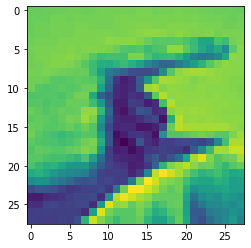

In [65]:
plt.imshow(images[0].reshape(28,28))

In [73]:
len(image_train)

27701

In [79]:
image_train, image_test, label_train, label_test = train_test_split(images, labels, random_state=23, train_size=.8)


In [47]:
image_train, val_image, label_train, val_label = train_test_split(image_train, label_train, random_state = 23, train_size = .75)

In [70]:
num_classes = 25
label_train = keras.utils.to_categorical(label_train, num_classes)
label_test = keras.utils.to_categorical(label_test, num_classes)

In [80]:
print('Train: X=%s, y=%s' % (image_train.shape, label_train.shape))
print('Test: X=%s, y=%s' % (image_test.shape, label_test.shape))

Train: X=(27701, 784), y=(27701,)
Test: X=(6926, 784), y=(6926,)


In [81]:
batch_size = 12
num_classes = 25
epochs = 10

# the data, split between train and test sets
# (image_train, label_train), (image_test, label_test) = mnist.load_data()

# image_train = image_train.reshape(27701, 784)
# image_test = image_test.reshape(6926, 784)
image_train = image_train.astype('float32')
image_test = image_test.astype('float32')
image_train /= 255
image_test /= 255
print(image_train.shape[0], 'train samples')
print(image_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
label_train = keras.utils.to_categorical(label_train, num_classes)
label_test = keras.utils.to_categorical(label_test, num_classes)

# specifying the model structure
model = Sequential()

# specify the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(784,)))

# specify the second layer
model.add(Dense(50, activation='relu'))

# specify the output layer
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

history = model.fit(image_train, label_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(image_test, label_test))
score = model.evaluate(image_test, label_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

27701 train samples
6926 test samples
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_30 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_31 (Dense)             (None, 25)                1275      
Total params: 43,075
Trainable params: 43,075
Non-trainable params: 0
_________________________________________________________________
Train on 27701 samples, validate on 6926 samples
Epoch 1/10
27701/27701 [==============================] - 22s 804us/step - loss: 3.2014 - accuracy: 0.0427 - val_loss: 3.1930 - val_accuracy: 0.0375
Epoch 2/10
27701/27701 [==============================] - 23s 844us/step - loss: 3.1882 - accuracy: 0.0419 - val_loss: 3.1864 - val_accuracy: 0

In [17]:
from keras.callbacks import EarlyStopping
n = 2
stopping_monitor = EarlyStopping(patience = n)

In [18]:
# model capacity - overfitting and underfitting 
# building deep learning model is an iterative process, and we cannot use architecture we learned before such as
# grid search - why?

# specifying the model structure
model = Sequential()

# specify the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))

# specify the second layer
model.add(Dense(50))
model.add(Dropout(0.2))

# specify the output layer
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

history = model.fit(image_train, label_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(image_test, label_test))
score = model.evaluate(image_test, label_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                39250     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 25)                1275      
Total params: 43,075
Trainable params: 43,075
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 29s 480u

In [82]:
import time 
tic = time.time()
model = Sequential()
# specify the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))

# specify the second layer
model.add(Dense(50))
model.add(Dropout(0.2))

# specify the output layer
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

history = model.fit(image_train, label_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(image_test, label_test))
score = model.evaluate(image_test, label_test, verbose=0)
toc = time.time()

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('run time:',toc-tic)


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 50)                39250     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 25)                1275      
Total params: 43,075
Trainable params: 43,075
Non-trainable params: 0
_________________________________________________________________
Train on 27701 samples, validate on 6926 samples
Epoch 1/10
27701/27701 [==============================] - 26s 931u

In [ ]:
tic = time.time()
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(image_train, label_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(image_test, label_test))
score = model.evaluate(image_test, label_test, verbose=0)
toc = time.time()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('run time:', toc-tic)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(30, activation='relu', input_shape=(784,))) # 2 hidden layers
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(25, activation='sigmoid'))

In [ ]:
model.compile(optimizer ='sgd' ,loss='categorical_crossentropy',metrics=['accuracy'])

histoire = model.fit(image_train,
                    label_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(image_test, label_test))

### CNN


In [55]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=( 28,28,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(28, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(28, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [56]:
val_label.shape

(6926,)

In [ ]:
history = model.fit(image_train,
                    label_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(image_test,lable_test))

In [ ]:
results_train = model.evaluate(train_images, train_y)

In [ ]:
results_test = model.evaluate(test_images, test_y)

In [ ]:
results_train

In [ ]:
results_test